# **Sales analysis of fashion company using Python**

## Overview

Company A sells fashion. They have stores in each country’s capital: UK (London); FR (Paris); IT (Milan); GER (Berlin). Their customers either buy online or in the store itself. 

At the same time, it maintains a website of individual product pages with write-ups and images about the page. In some cases, the page might have gone up after the product was put up for sale. 

## Data Source

- Customers & Transactions: Customer info and their transactions. These transactions are a mix of in-store and online transactions. The dataset contain three table sheet:
    - Customer information
    - Customer transaction
    - Item
- Website Traffic: Website traffic data for individual product pages (Duration: Jan to Dec 2020)

## Exploring Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import os

pd.options.display.float_format = '{:,.2f}'.format

### **1. Load the dataset**

#### Customer infomation

In [2]:
customer_info = pd.read_excel('customers(UK).xlsx', sheet_name='customer info') 
customer_info.head(5)

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N


#### Item

In [3]:
item = pd.read_excel('customers(UK).xlsx', sheet_name = 'Items')
item.head(5)

,ItemID,Product,Brand,SellPrice,CostPrice
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392


#### Customer transaction

In [4]:
customer_transaction = pd.read_excel('customers(UK).xlsx', sheet_name = 'Customer transactions')
customer_transaction.head(5)

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0,0,352,2020-03-21,In Store
1,0,0,3433,2020-07-14,In Store
2,0,0,11162,2020-08-09,In Store
3,0,0,13011,2020-12-07,In Store
4,0,0,13885,2020-11-08,In Store


#### Website Traffic

In [5]:
traffic_path = """traffic\\"""
list_files = os.listdir(traffic_path)

traffic = pd.DataFrame()
for i in list_files:
    traffic_1 = pd.read_excel(traffic_path+i)
    traffic = pd.concat([traffic, traffic_1])
    print('Processed file {}'.format(i))

Processed file 2020_01.xlsx
Processed file 2020_02.xlsx
Processed file 2020_03.xlsx
Processed file 2020_04.xlsx
Processed file 2020_05.xlsx
Processed file 2020_06.xlsx
Processed file 2020_07.xlsx
Processed file 2020_08.xlsx
Processed file 2020_09.xlsx
Processed file 2020_10.xlsx
Processed file 2020_11.xlsx
Processed file 2020_12.xlsx


In [6]:
traffic.head(5)

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,"5,669.20","5,777.80","6,286.40","Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.80,370.40,403.40,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.60,614.20,657.60,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,"1,284.00","1,308.60","1,385.40",Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,"1,846.00","1,880.80","2,025.00",Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08


### **2. Data Cleaning**

In [7]:
print("Number of missing values in customer_info:")
print(customer_info.isnull().sum())
print("Number of missing values in customer_transaction:")
print(customer_transaction.isnull().sum())

Number of missing values in customer_info:
ID              0
FirstName       0
LastName        0
Country         0
DateJoined      0
Gender        251
Birthday        0
Newsletter      0
dtype: int64
Number of missing values in customer_transaction:
OrderID            0
CustomerID         0
ItemID             0
TransactionDate    0
Channel            0
dtype: int64


In [10]:
print("Number of missing values in item:")
print(item.isnull().sum())
print("Number of missing values in traffic:")
print(traffic.isnull().sum())

Number of missing values in item:
ItemID       0
Product      0
Brand        0
SellPrice    0
CostPrice    0
dtype: int64
Number of missing values in traffic:
Page URL                  0
users                     0
uniquePageviews           0
pageviews                 0
Brand                     0
Posted On (DD/MM/YYYY)    0
dtype: int64


### **3. Revenue by Country**

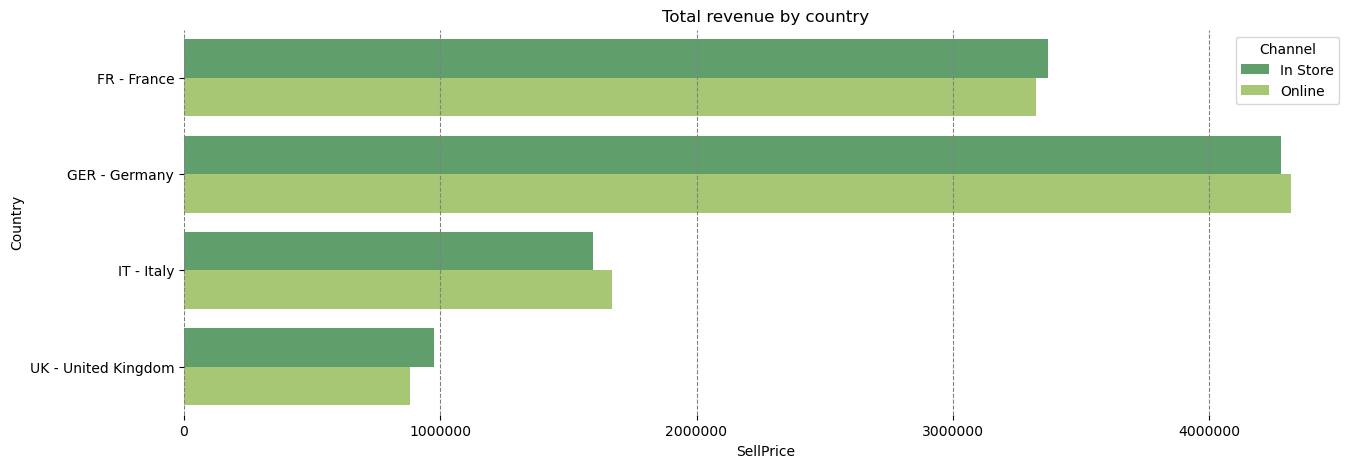

In [33]:
country_revenue = customer_transaction.merge(item, on ='ItemID', how = 'left')
country_revenue = country_revenue.groupby(['CustomerID', 'Channel'])['SellPrice'].sum().reset_index()
country_revenue = country_revenue.merge(customer_info, left_on= 'CustomerID', right_on = 'ID', how = 'left')
country_revenue = country_revenue.groupby(['Country', 'Channel'])['SellPrice'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data = country_revenue, y='Country', x='SellPrice', hue='Channel', orient= 'h', palette= 'summer')
sns.despine(bottom=True, left=True)
plt.grid(axis = 'x', color = 'gray', linestyle = '--')
ax.set(title= 'Total revenue by country')

ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("%.0f"))

### **4. Exploring Relationships**

#### The relationship and impact between website traffic and revenue

In [11]:
# Total website traffic by date

website_traffic = traffic[['uniquePageviews', 'Posted On (DD/MM/YYYY)']]
website_traffic.rename(columns= {'Posted On (DD/MM/YYYY)':'Date'}, inplace= True)
website_traffic.rename(columns= {'uniquePageviews':'Web_Traffic'}, inplace= True)
website_traffic['Date'] = website_traffic['Date'].dt.date
website_traffic['Date'] = pd.to_datetime(website_traffic['Date'])
website_traffic = website_traffic.groupby('Date').sum().reset_index()
website_traffic

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7408\923247662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website_traffic.rename(columns= {'Posted On (DD/MM/YYYY)':'Date'}, inplace= True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7408\923247662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website_traffic.rename(columns= {'uniquePageviews':'Web_Traffic'}, inplace= True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7408\923247662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Date,Web_Traffic
0,2020-01-01,"64,814.80"
1,2020-01-02,"113,640.00"
2,2020-01-03,"65,175.40"
3,2020-01-04,"14,274.60"
4,2020-01-05,"47,856.60"
...,...,...
338,2020-12-05,"24,678.80"
339,2020-12-06,"26,517.00"
340,2020-12-07,"97,565.00"
341,2020-12-08,"105,419.60"


In [12]:
revenue = customer_transaction.merge(item, on = 'ItemID',how = 'left')
revenue.rename(columns={'SellPrice':'Revenue'},inplace=True)
revenue

,OrderID,CustomerID,ItemID,TransactionDate,Channel,Product,Brand,Revenue,CostPrice
0,0,0,352,2020-03-21,In Store,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
1,0,0,3433,2020-07-14,In Store,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
2,0,0,11162,2020-08-09,In Store,sevCrtage0.255053382396546,Wem+H2Pk8Jfbb*[D,582,391
3,0,0,13011,2020-12-07,In Store,theB-info0.46598133500784,ThcmX`v~{K~t{Jeh,339,135
4,0,0,13885,2020-11-08,In Store,kanyained0.673922507607742,Ka53T<K8f.2M94Yd,1369,231
...,...,...,...,...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store,belUition0.249973899862794,"Ac8IJsKH,4xtY.Tk",1077,242
25209,8361,769,13162,2020-02-04,In Store,zenpkawae0.226346388966917,"Ince!T,;eW/4o\eg",1140,253
25210,8362,769,8727,2020-11-18,In Store,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205,66
25211,8362,769,13065,2020-05-11,In Store,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012,272


<Axes: >

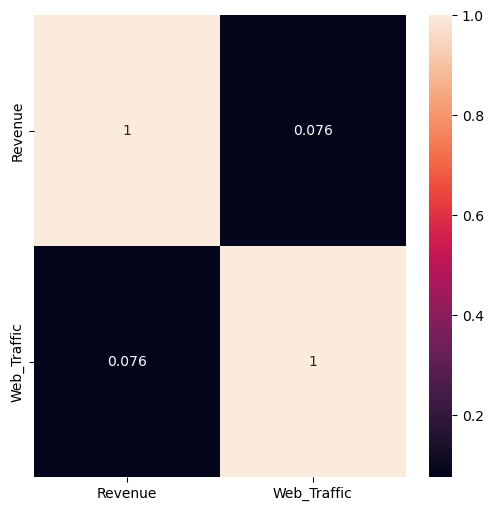

In [56]:
revenue = revenue[['TransactionDate', 'Revenue']]
revenue = revenue.groupby('TransactionDate').sum().reset_index()
revenue.rename(columns={'TransactionDate':'Date'},inplace=True)

corr = revenue.merge(website_traffic, how= 'inner', on ='Date')
corr = corr.drop('Date', axis=1)

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr.corr(), annot = True, ax = ax)

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


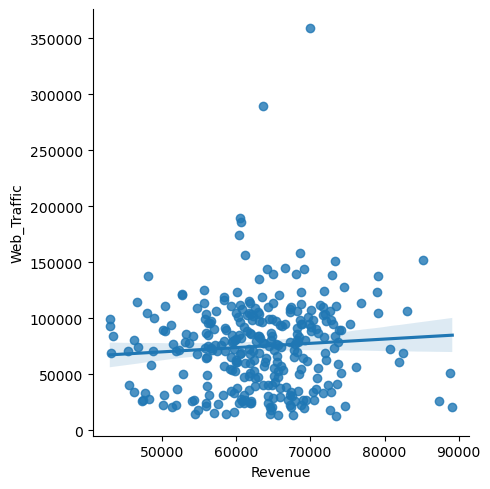

In [43]:
sns.lmplot(data=corr, x="Revenue", y="Web_Traffic")

#### The relationship and impact between website traffic and revenue online/offline

In [17]:
# Revenue online by date

revenue_online = revenue[revenue['Channel'] == 'Online']
revenue_online = revenue_online[['TransactionDate', 'Revenue']]
revenue_online = revenue_online.groupby('TransactionDate').sum().reset_index()
revenue_online.rename(columns={'TransactionDate':'Date'},inplace=True)
revenue_online.rename(columns={'Revenue':'RevenueOnline'},inplace=True)
revenue_online

,Date,RevenueOnline
0,2020-01-01,32044
1,2020-01-02,31612
2,2020-01-03,30635
3,2020-01-04,24627
4,2020-01-05,29254
...,...,...
319,2020-12-23,32516
320,2020-12-24,16626
321,2020-12-25,31365
322,2020-12-26,33473


In [16]:
# Revenue offline by date

revenue_offline = revenue[revenue['Channel'] == 'In Store']
revenue_offline = revenue_offline[['TransactionDate', 'Revenue']]
revenue_offline = revenue_offline.groupby('TransactionDate').sum().reset_index()
revenue_offline.rename(columns={'TransactionDate':'Date'},inplace=True)
revenue_offline.rename(columns={'Revenue':'RevenueOffline'},inplace=True)
revenue_offline


,Date,RevenueOffline
0,2020-01-01,23820
1,2020-01-02,24069
2,2020-01-03,37118
3,2020-01-04,39946
4,2020-01-05,31844
...,...,...
319,2020-12-23,29118
320,2020-12-24,27640
321,2020-12-25,31697
322,2020-12-26,23072


<Axes: >

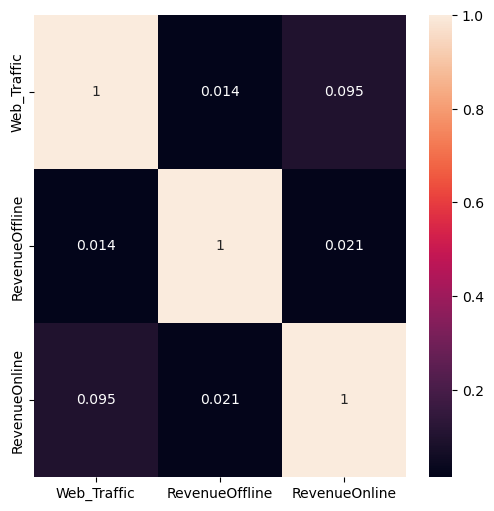

In [53]:
corr_1 = website_traffic.merge(revenue_offline,on='Date',how='inner').merge(revenue_online,on='Date',how='inner')
corr_1 = corr_1.drop('Date', axis=1)

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr_1.corr(), annot = True, ax = ax)

In [76]:
corr_1

,Web_Traffic,RevenueOffline,RevenueOnline
0,"64,814.80",23820,32044
1,"113,640.00",24069,31612
2,"65,175.40",37118,30635
3,"14,274.60",39946,24627
4,"47,856.60",31844,29254
...,...,...,...
300,"24,678.80",29968,25985
301,"26,517.00",26476,20930
302,"97,565.00",33327,32038
303,"105,419.60",32812,34410


<Axes: xlabel='RevenueOnline', ylabel='Web_Traffic'>

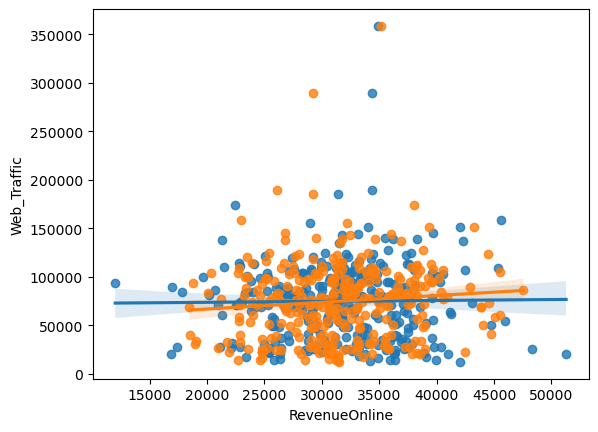

In [74]:
sns.regplot(data=corr_1, x="RevenueOffline", y="Web_Traffic")
sns.regplot(data=corr_1, x="RevenueOnline", y="Web_Traffic")

<Axes: xlabel='RevenueOnline', ylabel='Web_Traffic'>

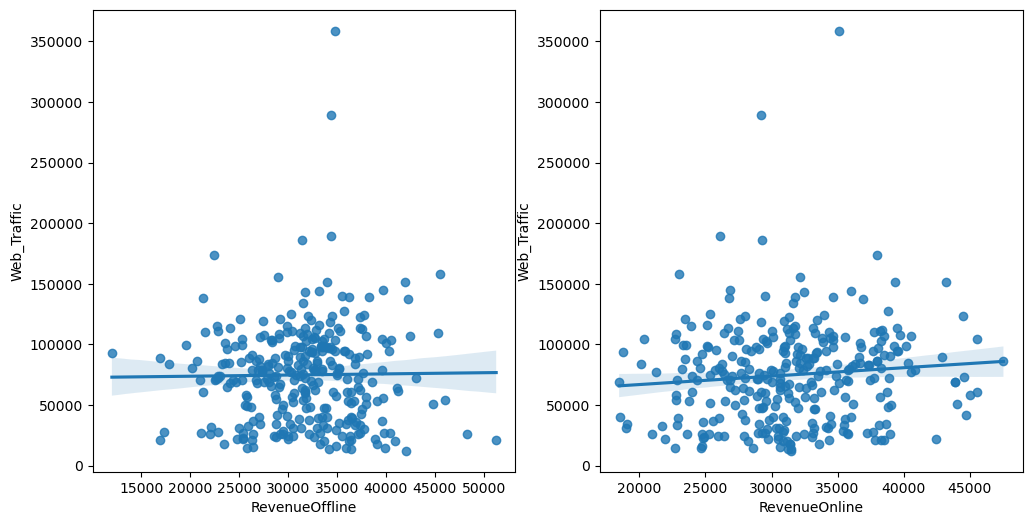

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(data=corr_1, x="RevenueOffline", y="Web_Traffic", ax=ax1)
sns.regplot(data=corr_1, x="RevenueOnline", y="Web_Traffic", ax=ax2)

Axes(0.125,0.2;0.775x0.68)


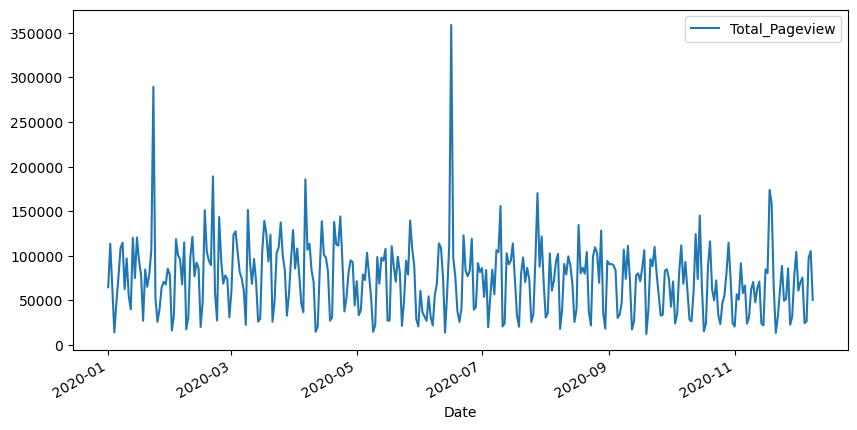

In [65]:
print(website_traffic.plot(x='Date',y='website_traffic',kind='line',figsize = [10,5]))

Axes(0.125,0.2;0.775x0.68)


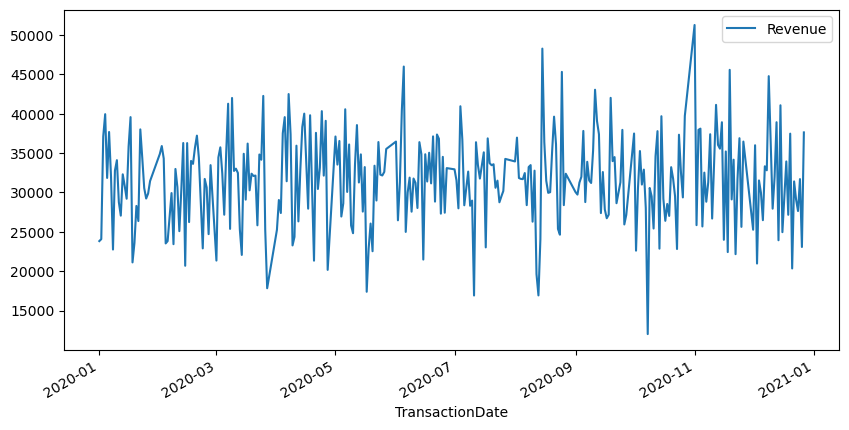

In [71]:
print(revenue_offline.plot(x='TransactionDate',y='Revenue',kind='line',figsize = [10,5]))

Axes(0.125,0.2;0.775x0.68)


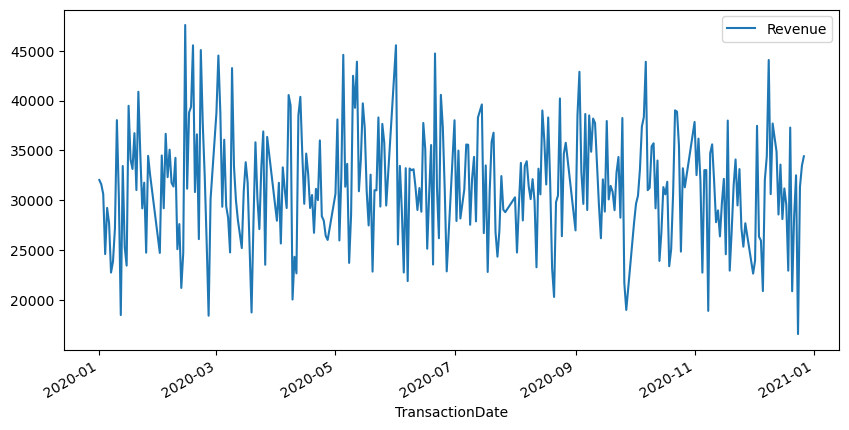

In [72]:
print(revenue_online.plot(x='TransactionDate',y='Revenue',kind='line',figsize = [10,5]))